#4-1 Binary Search
In this problem, you will implement the binary search algorithm that allows searching
very efficiently (even huge) lists, provided that the list is sorted.

In [ ]:
%%writefile binary_search.cpp

#include <iostream>
#include <cassert>
#include <vector>

using std::vector;

int binary_search(const vector<int> &a, int x) {
  int left = 0, right = (int)a.size();
    int m=right-1;
  left=right/2;

  while(a[left]!=x)
  {
      right=right/2;
      if(a[left]>x)
      {
          if(a[0]==x)
          {
              return 0;
          }
          if(right==0)
          {
              return -1;
          }
          left=left-right;
      }
      else
      {
          left=left+right;
          if(left>m || right==0)
          {
              return -1;
          }
      }
  }
  return left;
}

int linear_search(const vector<int> &a, int x) {
  for (size_t i = 0; i < a.size(); ++i) {
    if (a[i] == x) return i;
  }
  return -1;
}

int main() {
  int n;
  std::cin >> n;
  vector<int> a(n);
  for (size_t i = 0; i < a.size(); i++) {
    std::cin >> a[i];
  }
  int m;
  std::cin >> m;
  vector<int> b(m);
  for (int i = 0; i < m; ++i) {
    std::cin >> b[i];
  }
  for (int i = 0; i < m; ++i) {
    //replace with the call to binary_search when implemented
    std::cout << linear_search(a, b[i]) << ' ';
  }
}


Writing binary_search.cpp


In [ ]:
!g++ binary_search.cpp -o binary_search
!./binary_search

5 1 5 8 12 13
5 8 1 23 1 11
2 0 -1 0 -1 

#4-2 Majority Element
Majority rule is a decision rule that selects the alternative which has a majority,
that is, more than half the votes.
Given a sequence of elements 𝑎1, 𝑎2, . . . , 𝑎𝑛, you would like to check whether
it contains an element that appears more than 𝑛/2 times.

In [ ]:
%%writefile majority_element.cpp

#include <algorithm>
#include <iostream>
#include <vector>

using std::vector;

int get_majority_element(vector<int> &a, int left, int right) {
  int cont1=0;
  int cont2=0;
  int mit=(left+right)/2;

  if (left == right) return -1;
  if (left+1==right) return a[left];
  if (left+2==right) return a[left];

  int le=get_majority_element(a,left,mit);
  int ri=get_majority_element(a,mit,right);

  for(int i=left;i<right;i++)
  {
      int aux=a[i];
      if(aux==le) cont1+=1;
      else if(aux==ri) cont2+=1;
  }

  if(cont1>((right-left)/2) && le!=-1) return le;
  if(cont2>((right-left)/2) && ri!=-1) return ri;
  return -1;
}

int main() {
  int n;
  std::cin >> n;
  vector<int> a(n);
  for (size_t i = 0; i < a.size(); ++i) {
    std::cin >> a[i];
  }
  std::cout << (get_majority_element(a, 0, a.size()) != -1) << '\n';
}


Writing majority_element.cpp


In [ ]:
!g++ majority_element.cpp -o majority_element
!./majority_element

5
2 3 9 2 2
1


In [ ]:
!g++ majority_element.cpp -o majority_element
!./majority_element

4
1 2 3 4
0


In [ ]:
!g++ majority_element.cpp -o majority_element
!./majority_element

4
1 2 3 1
0


#4-3 Improving Quick Sort
The goal in this problem is to redesign a given implementation of the randomized
quick sort algorithm so that it works fast even on sequences containing
many equal elements.

In [ ]:
%%writefile sorting.cpp

#include <algorithm>
#include <iostream>
#include <iostream>
#include <vector>
#include <cstdlib>

using std::vector;
using std::swap;

vector<int> jk(2);
vector<int> mn(2);

void partition3 (vector<int> &a, int l, int r) {
    int x = a[l];
  jk[0]=l;
  jk[1]=l;
  for (int i = l + 1; i <= r; i++) {
    if (a[i] < x)
    {
        swap(a[i], a[jk[0]]);
        jk[0]+=1;
        jk[1]+=1;
        swap(a[i], a[jk[1]]);
    }
    else if(a[i]==x)
    {
        jk[1]+=1;
        swap(a[i], a[jk[1]]);
    }
  }
  mn[0]=jk[0];
  mn[1]=jk[1];
}

void randomized_quick_sort(vector<int> &a, int l, int r) {
  if (l >= r) {
    return;
  }

  int k = l + rand() % (r - l + 1);
  swap(a[l], a[k]);
  partition3(a, l, r);
  randomized_quick_sort(a, l, mn[0] - 1);
  randomized_quick_sort(a, mn[1] + 1, r);
}

int main() {
  int n;
  std::cin >> n;
  vector<int> a(n);
  for (size_t i = 0; i < a.size(); ++i) {
    std::cin >> a[i];
  }
  randomized_quick_sort(a, 0, a.size() - 1);
  for (size_t i = 0; i < a.size(); ++i) {
    std::cout << a[i] << ' ';
  }
}


Writing sorting.cpp


In [ ]:
!g++ sorting.cpp -o sorting
!./sorting

5
2 3 9 2 2
2 2 2 3 9 

#Coursera

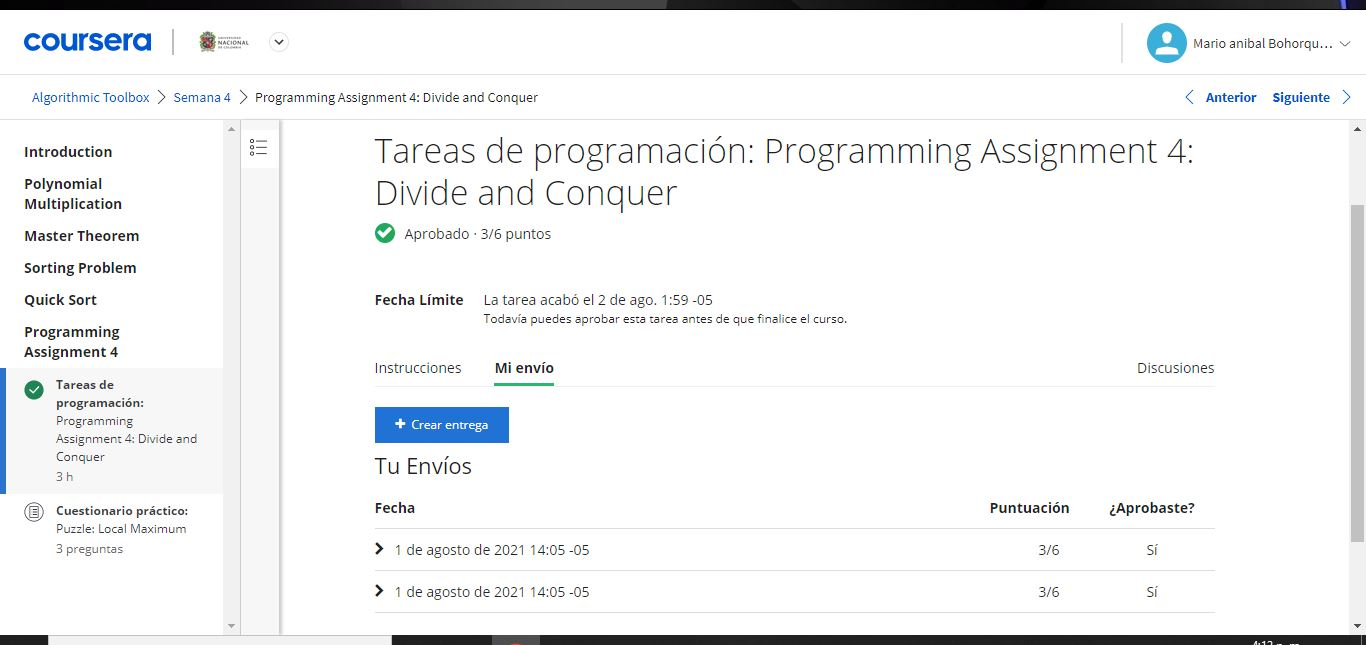